# ¡Hola, Aldo!

Mi nombre es Carlos Ortiz, soy code reviewer de TripleTen y voy a revisar el proyecto que acabas de desarrollar.

Cuando vea un error la primera vez, lo señalaré. Deberás encontrarlo y arreglarlo. La intención es que te prepares para un espacio real de trabajo. En un trabajo, el líder de tu equipo hará lo mismo. Si no puedes solucionar el error, te daré más información en la próxima ocasión.

Encontrarás mis comentarios más abajo - **por favor, no los muevas, no los modifiques ni los borres**.

¿Cómo lo voy a hacer? Voy a leer detenidamente cada una de las implementaciones que has llevado a cabo para cumplir con lo solicitado. Verás los comentarios de esta forma:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
    
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
</div>
¡Empecemos!


# Descripción del proyecto

Trabajas para la tienda online Ice que vende videojuegos por todo el mundo. Las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas. Tienes que identificar patrones que determinen si un juego tiene éxito o no. Esto te permitirá detectar proyectos prometedores y planificar campañas publicitarias.

Delante de ti hay datos que se remontan a 2016. Imaginemos que es diciembre de 2016 y estás planeando una campaña para 2017.
(Lo importante es adquirir experiencia de trabajo con datos. Realmente no importa si estás pronosticando las ventas de 2017 en función de los datos de 2016 o las ventas de 2027 en función de los datos de 2026.)

El dataset contiene la abreviatura ESRB. The Entertainment Software Rating Board (la Junta de clasificación de software de entretenimiento) evalúa el contenido de un juego y asigna una clasificación de edad como Adolescente o Adulto.


# Introducción

El archivo games se compone de las siguientes columnas:

- `Name`: Nombre del juego.
- `Platform`: Plataforma en la que está disponible el juego (por ejemplo, Wii, NES, GB).
- `Year_of_Release`: Año en que se lanzó el juego.
- `Genre`: Género del juego (como Sports, Platform, Racing).
- `NA_sales`: Ventas en Norteamérica (en millones de dólares).
- `EU_sales`: Ventas en Europa (en millones de dólares).
- `JP_sales`: Ventas en Japón (en millones de dólares).
- `Other_sales`: Ventas en otras regiones (en millones de dólares).
- `Critic_Score`: Puntuación de los críticos (máximo de 100).
- `User_Score`: Puntuación de los usuarios (máximo de 10, pero puede incluir valores como 'tbd').
- `Rating`: Clasificación ESRB (Entertainment Software Rating Board).

**Revisar**: https://packaging.python.org/en/latest/tutorials/packaging-projects/


In [2]:
import os
import re
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats as st

# 1. Ejecutamos funcion personalizada

llamamos a la funcion execute_analysis para:

1. Corregir los nombres de las columnas
2. Buscar y corregir duplicados (desactivado en este caso)


In [3]:
"""
Módulo para realizar un Análisis Exploratorio de Datos (EDA) básico en un archivo CSV.
"""


def execute_analysis(file_name: str, normalize_cols=True,
                     check_duplicates=True, show_summary_flag=True) -> pd.DataFrame:
    """
    Ejecuta un análisis exploratorio de datos en un archivo CSV.

    :param file_name: Nombre del archivo CSV a leer.
    :param normalize_cols: Booleano, si se normalizan los nombres de columnas.
    :param check_duplicates: Booleano, si se verifica y elimina duplicados.
    :param show_summary_flag: Booleano, si se muestra un resumen del DataFrame.
    :return: DataFrame de pandas o None en caso de error.
    """
    data_frame = None
    file_found = False

    # Directorios en los que buscar el archivo, local y en la nube
    directories = ['datasets/', 'notebooks/', '']
    current_dir = os.getcwd()

    # Primero, intentar leer usando rutas relativas al directorio actual
    for folder in directories:
        file_path = os.path.join(
            current_dir, folder, file_name) if folder else file_name
        print(f"Intentando leer desde: {file_path}")  # Mensaje de depuración

        try:
            # Imprime el contenido del directorio si es uno de los esperados
            if folder in ['datasets/', 'notebooks/']:
                print(f"Contenido del directorio {os.path.join(current_dir, folder)}: {
                      os.listdir(os.path.join(current_dir, folder))}")

            # Intento de leer el archivo
            data_frame = pd.read_csv(file_path)
            file_found = True
            # Mensaje de depuración
            print(f"Archivo encontrado en: {file_path}")
            break
        except FileNotFoundError:
            print(f"No se encontró el archivo en: {
                  file_path}")  # Mensaje de depuración
            continue

    # Si no se encuentra, intentar leer usando rutas relativas a la raíz
    if not file_found:
        directories = ['/datasets/', '/notebooks/', '']
        for folder in directories:
            file_path = os.path.join(
                folder, file_name) if folder else file_name
            # Mensaje de depuración
            print(f"Intentando leer desde: {file_path}")
            try:
                data_frame = pd.read_csv(file_path)
                file_found = True
                # Mensaje de depuración
                print(f"Archivo encontrado en: {file_path}")
                break
            except FileNotFoundError:
                print(f"No se encontró el archivo en: {
                      file_path}")  # Mensaje de depuración
                continue

    # Si después de ambos bucles el archivo no se encontró, retornar None
    if not file_found:
        print("Archivo no encontrado en las rutas especificadas.")
        return None

    if normalize_cols:
        data_frame = normalize_column_names(data_frame)

    if check_duplicates:
        data_frame = check_for_duplicates(data_frame)
        if data_frame.empty:
            print("Datos vacíos tras eliminar duplicados.")
            return None

    if show_summary_flag:
        show_summary(data_frame)

    return data_frame


def normalize_column_names(data_frame: pd.DataFrame) -> pd.DataFrame:
    """
    Normaliza los nombres de las columnas de un DataFrame a snake_case.

    :param data_frame: DataFrame de pandas.
    :return: DataFrame con nombres de columnas normalizados.
    """
    # *********** Corregir: Está colocando doble guión bajo ***********
    data_frame.columns = [re.sub(r'(?<!^)(?=[A-Z])', '_', col).lower().replace(' ', '_').replace('__', '_')
                          for col in data_frame.columns]
    return data_frame


def check_for_duplicates(data_frame: pd.DataFrame) -> pd.DataFrame:
    """
    Verifica y elimina filas duplicadas en un DataFrame.

    :param data_frame: DataFrame de pandas.
    :return: DataFrame sin duplicados.
    """
    if data_frame.duplicated().sum() > 0:
        print("Duplicados encontrados. Eliminando...")
        data_frame.drop_duplicates(inplace=True)
    return data_frame


def show_summary(data_frame: pd.DataFrame):
    """
    Muestra un resumen del DataFrame.

    :param data_frame: DataFrame de pandas.
    """
    print("Primeras 5 filas:")
    print(data_frame.head())
    print("\nÚltimas 5 filas:")
    print(data_frame.tail())
    print("\nMuestra aleatoria de 5 filas:")
    print(data_frame.sample(5))

    print("\nInformación del DataFrame:")
    print(data_frame.info())

    print("\nEstadísticas Descriptivas:")
    print(data_frame.describe())

    print("\nValores Faltantes:")
    print(data_frame.isnull().sum())

    print("\nHistogramas para Variables Numéricas:")
    data_frame.hist(bins=15, figsize=(15, 10))
    plt.show()

    if data_frame.select_dtypes(include=[np.number]).shape[1] > 1:
        print("\nMapa de Calor de Correlación:")
        sns.heatmap(data_frame.corr(), annot=True)
        plt.show()

    print("\nAnálisis de Variables Categóricas:")
    for column in data_frame.select_dtypes(include=['object']).columns:
        print(f"\nDistribución de la variable {column}:")
        print(data_frame[column].value_counts())
        sns.countplot(y=column, data=data_frame)
        plt.show()

In [4]:
df_games = execute_analysis(
    'games.csv', normalize_cols=True, check_duplicates=False, show_summary_flag=False)

In [5]:
df_games.info()

In [6]:
df_games.head(10)

Habiéndose corregido los nombres de las columnas en formato snake_case, procedemos a revisar si el tipo de datos para cada una de las columnas es el que corresponde de acuerdo a la información que contineue.


In [7]:
# Columnas
for col in df_games.columns:
    print(f"\nColumna: {col}\n")
    print(df_games[col].head(10))
    print(type(df_games[col].iloc[1]))
    print()

# 2. Convierte los datos en los tipos necesarios.

Vemos que la situación de que los tipos de datos no coinciden con los datos que contiene, se da particularmente en la columna `rating`, `year_of_realase`. Y hay que adicionalmente hay que revisar cómo son los datos para las columnas `critic_score`, `user_score`.


In [8]:
# Vemos que los unicos valores conflictivos es el 'nan'
print(df_games.critic_score.unique())

In [9]:
# Vemos que los valores están en formato str cuando debiera ser de tipo float
print(df_games.user_score.unique())

In [10]:
coef = len(df_games[df_games['user_score'] == 'tbd']) / \
    len(df_games['user_score'])
print(coef*100)

Vemos que los datos son de tipo `str` y que tenemos un valor `tbd` que en este caso, reemplazaremos con NaN, pues, cualquier otro valor podria afectar el cálculo de la media. Podría reemplazarse con la media, pero el valor es incierto, tener un valor arbitrario podría sesgar los resultados si los valores "tbd" no se distribuyen de manera similar a los datos existentes.

Los datos NaN representan un 14% de los valores totales, por los que podemos prescindir de estos por las razones antes expuestas.


**Vemos que:**

- los valores están en formato str cuando debiera ser de tipo float
- existe un valor llamado `tbd` que es el que hace que los valores de esta columna se vayan a float

**¿Qué podemos hacer al respecto?** --> Vemos que el valor 0 ya existe, por lo que debemos tomar otro valor y en este caso estamos tomando el valor `NaN`


In [11]:
# Convertimos los valores 'tbd' a NaN
df_games['user_score'].replace('tbd', np.nan, inplace=True)

In [12]:
# Convertir la columna `critic_score` a float
df_games = df_games.astype({'critic_score': 'float64'})

In [13]:
df_games.info()

El reemplazo de los valores `tbd` en la columna user_score por valores NaN es una decisión sustentada pues, en la evidencia de que la información que hay no es suficiente para asignar un valor numérico concreto a estos `tbd`.

Este enfoque es útil por varias razones:

- **Mantiene la Integridad de los Datos**: Al reemplazar `tbd` con NaN, se mantiene la naturaleza numérica de la columna `user_score`, lo cual es importante para el análisis estadístico y las operaciones matemáticas.

- **Evita la Introducción de Sesgos**: Imputar `tbd` con un valor arbitrario (como 0 o el promedio) podría introducir sesgos en el análisis, especialmente si no hay una base sólida para esa imputación.

- **Facilita el Análisis Posterior**: Tratar con NaN es más sencillo en pandas y Python en general. Se puede decidir más tarde cómo manejar estos NaN (por ejemplo, imputación, eliminación, etc.) basándote en el contexto del análisis.

- **Claridad en el Análisis**: Al convertir `tbd` en NaN, queda claro para cualquier persona que revise este análisis que estos valores eran indeterminados en el conjunto de datos original.


### `year_of_release`

El tipo de datos de `year_of_release` aparece como tipo `float` cuando este debiese ser de tipo `int`. Surgen dos opciones para tratar estos datos; la primera, es quitar los `NaN` y hacer el casteo y la segunda, es reemplazar el valor NaN por un valor representativo, en este caso puede ser el valor que más se repite o la media de estos.

**Primero**
Veamos cuántos datos dentro de la columna `year_of_release` aparecen con NaN


In [14]:
# Calcular el ratio de valores NaN en la columna 'year_of_release'
ratio = len(df_games[df_games['year_of_release'].isna()]
            ) / len(df_games['year_of_release'])

# Imprimir el porcentaje con dos decimales
print(f"{ratio * 100:.2f}%")

In [15]:
# Convertir los valores no enteros y NaN a NaN
df_games['year_of_release'] = pd.to_numeric(
    # Convierte no numéricos a NaN
    df_games['year_of_release'], errors='coerce')

El DataFrame resultante tiene todos los valores de `year_of_release` como enteros, con 0 representando los valores originalmente no numéricos o NaN. ​


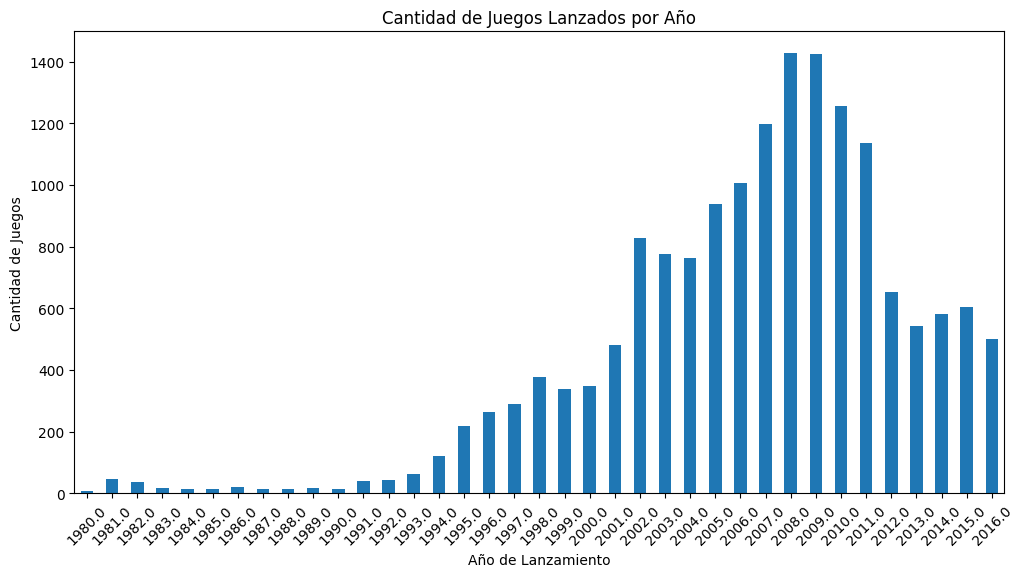

In [16]:
# Contar la cantidad de juegos por año
juegos_por_año = df_games['year_of_release'].value_counts().sort_index()

# Graficar
plt.figure(figsize=(12, 6))
juegos_por_año.plot(kind='bar')
plt.title('Cantidad de Juegos Lanzados por Año')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Cantidad de Juegos')
plt.xticks(rotation=45)
plt.show()

## Observaciones

- A partir de la tabla, se evidencia que la cantidad de valores anómalos se representa al inicio del gráfico.
- Que la cantidad de juegos incrementaron progresivamente, pero aumentaron explosivamente a partir del año 2001, sin embargo, volvieron a un valor cercano al de sus inicios en el año 2012.
- Alcanzó valores máximos en el año 2008-2009 y mínimo en 1980.

Habria que revisar qué plataformas son las que más juegos produjeron y qué juegos fueron los más exitosos.


## Variación de ventas por plataforma por año.

Considerando que lo que se desea es determinar dónde poner recursos y atención debemos en primera instancia determinar para qué período debes tomar datos y para esto, debemos tomar el periodo 2011-2016 pues fue en ese intervalo de tiempo en que las ventas comenzaron a registrar una tendencia a la baja y por ende, sería bueno saber qué plataformas son líderes en ventas, cuáles crecen y cuáles se reducen.

Eligiremos plataformas potencialmente rentables basándonos en este periodo y para ello, estableceremos un filtro


In [17]:
# Suponiendo que el año más reciente en tus datos es 2016
año_mas_reciente = df_games['year_of_release'].max()
año_inicio = año_mas_reciente - 5  # Los últimos 5 años

# Filtrar el DataFrame para incluir solo estos años
df_games_recent = df_games[df_games['year_of_release'] > año_inicio].copy()

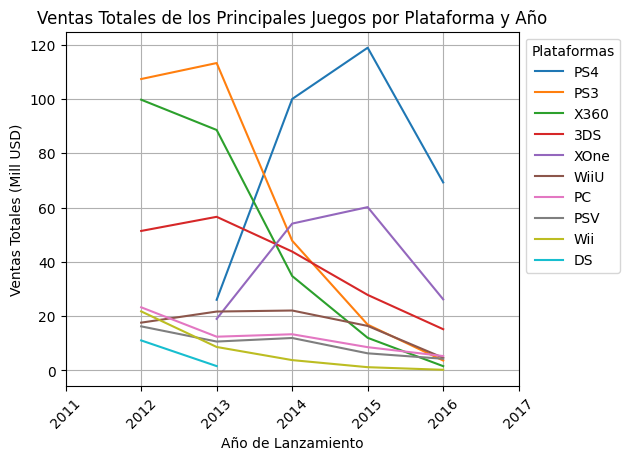

In [26]:
# Crear la columna 'total_sales' sumando j_p_sales, e_u_sales y n_a_sales
df_games_recent['total_sales'] = df_games_recent['j_p_sales'] + \
    df_games_recent['e_u_sales'] + \
    df_games_recent['n_a_sales'] + df_games_recent['other_sales']

# Crear el pivot table para ventas por plataforma y año
ventas_por_plataforma_año = df_games_recent.pivot_table(index='year_of_release',
                                                        values='total_sales',
                                                        columns='platform',
                                                        aggfunc='sum')

# Sumar ventas totales para cada plataforma a lo largo de los años
ventas_totales_por_plataforma = ventas_por_plataforma_año.sum().sort_values(ascending=False)

# Seleccionar las top N plataformas con mayores ventas totales
top_plataformas = ventas_totales_por_plataforma.head(10).index

# Filtrar el pivot table para incluir solo las top plataformas
ventas_top_plataformas = ventas_por_plataforma_año[top_plataformas]

# Graficar las ventas totales de las top plataformas a lo largo de los años
plt.figure(figsize=(12, 6))
ventas_top_plataformas.plot(kind='line')
plt.title('Ventas Totales de los Principales Juegos por Plataforma y Año')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Ventas Totales (Mill USD)')
plt.xticks(rotation=45)
plt.legend(title='Plataformas', bbox_to_anchor=(1.0, 1), loc='upper left')
plt.tight_layout()

# Ajustar los límites del eje X
plt.xlim(2011, 2017)
plt.grid()

plt.show()

## <u>Observaciones</u>

A partir del gráfico se evidencia que las plataformas muestran una vida media de aproximadamente 4-5 años. Esto se puede apreciar pues, las graficas se van haciendo populares, alcanzar un máximo en torno al cual oscilan, pero finalmente decaen al cabo de ese tiempo.

Determina para qué período debes tomar datos. Para hacerlo mira tus respuestas a las preguntas anteriores. Los datos deberían permitirte construir un modelo para 2017.

### 1. ¿Cuáles son los principales problemas que se deben abordar en el diseño y construcción del proyecto

Tomamos en consideración los datos que van desde el 2012-2017 pues, es a partir de ese año que se observa un incremento de las ventas, teniendo como tope el año 2017 como último registro de datos. Se trabajó con `xlim` hasta el 2017 por un tema de optimizar la visualización de los registros.

### 2. ¿Qué plataformas son líderes en ventas?

Las plataformas más populares fueron `PS4` y `XOne`, y las menos populares `PS3` y `X360`, sin embargo, se aprecia que la vida media de la PS3 fue mayor a la usual.

Se pueden observar transiciones entre las generaciones de consolas. Por ejemplo, el declive en las ventas de la PS3 coincide con un aumento en las ventas de la PS4, lo que sugiere un cambio de los consumidores de una generación de consolas a la siguiente.

En complemento a lo anteriormente expuesto podemos señalar que si bien la plataforma `pc` no alcanza ventas considerablemente altas, si se tiene que estas son constantes y desafían la vida media de las otras plataformas con una tendencia al alza a partir del año 2006 con un máximo en el año 2012. Sería interesante ver qué se hizo de diferente ese año como para que tuviera ese máximo.

<!-- Elige varias plataformas potencialmente rentables. -->


## Distribución de datos

<!-- Determina para qué período debes tomar datos. Para hacerlo mira tus respuestas a las preguntas anteriores. Los datos deberían permitirte construir un modelo para 2017.
Trabaja solo con los datos que consideras relevantes. Ignora los datos de años anteriores. -->


In [27]:
# Lista para almacenar los datos de cada plataforma para el boxplot
data_to_plot = [ventas_top_plataformas[platform].dropna()
                for platform in ventas_top_plataformas]

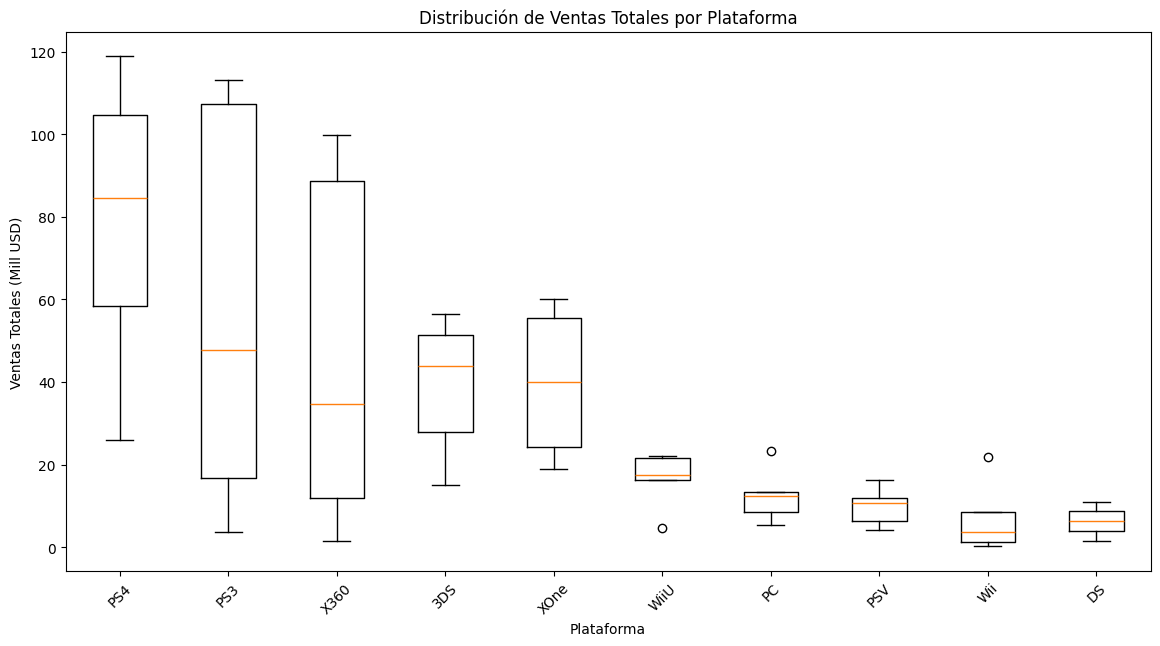

In [28]:
# Crear el gráfico de caja
plt.figure(figsize=(14, 7))
plt.boxplot(data_to_plot)

# Establecer las etiquetas del eje x con los nombres de las plataformas
plt.xticks(range(1, len(ventas_top_plataformas.columns) + 1),
           ventas_top_plataformas.columns, rotation=45)

# Títulos y etiquetas
plt.title('Distribución de Ventas Totales por Plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Totales (Mill USD)')
plt.show()

## <u>Observaciones</u>

El diagrama de caja (boxplot) que muestra la distribución de las ventas totales de juegos por plataforma nos permite inferir que:

Hay una variación notable en la mediana de las ventas entre las plataformas, lo que indica que algunas son más rentables que otras. Las plataformas con medias más altas posiblemente tienen un mayor número de títulos exitosos o una base de usuarios más amplia. Lo vemos en el caso de las plataformas de PS4 que

Algunas plataformas tienen una gran variabilidad en sus ventas (indicada por cajas más largas y bigotes que se extienden lejos de la caja, como es el caso de `X360` y `PS3`), lo que sugiere que mientras algunos de sus juegos tienen un rendimiento excepcionalmente alto, otros no lo hacen. Por otro lado, las plataformas con cajas más pequeñas tienen menos variabilidad y, posiblemente, ventas más consistentes `PS4` y `XOne`.

La presencia de valores atípicos (indicados por los puntos fuera de los bigotes del boxplot) en algunas plataformas sugiere que hubo títulos con ventas excepcionales que excedieron significativamente el rendimiento promedio.

Por ahora, la plataforma más rentable parece ser la PS4 junto a la PS3 por cuanto sus medias, y rangos intercuartílicos señalan que estos poseen una consistencia de ventas.


## <u>Análisis de juegos según calificación de usuarios.</u>

<!-- Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección). Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas. Saca conclusiones. -->


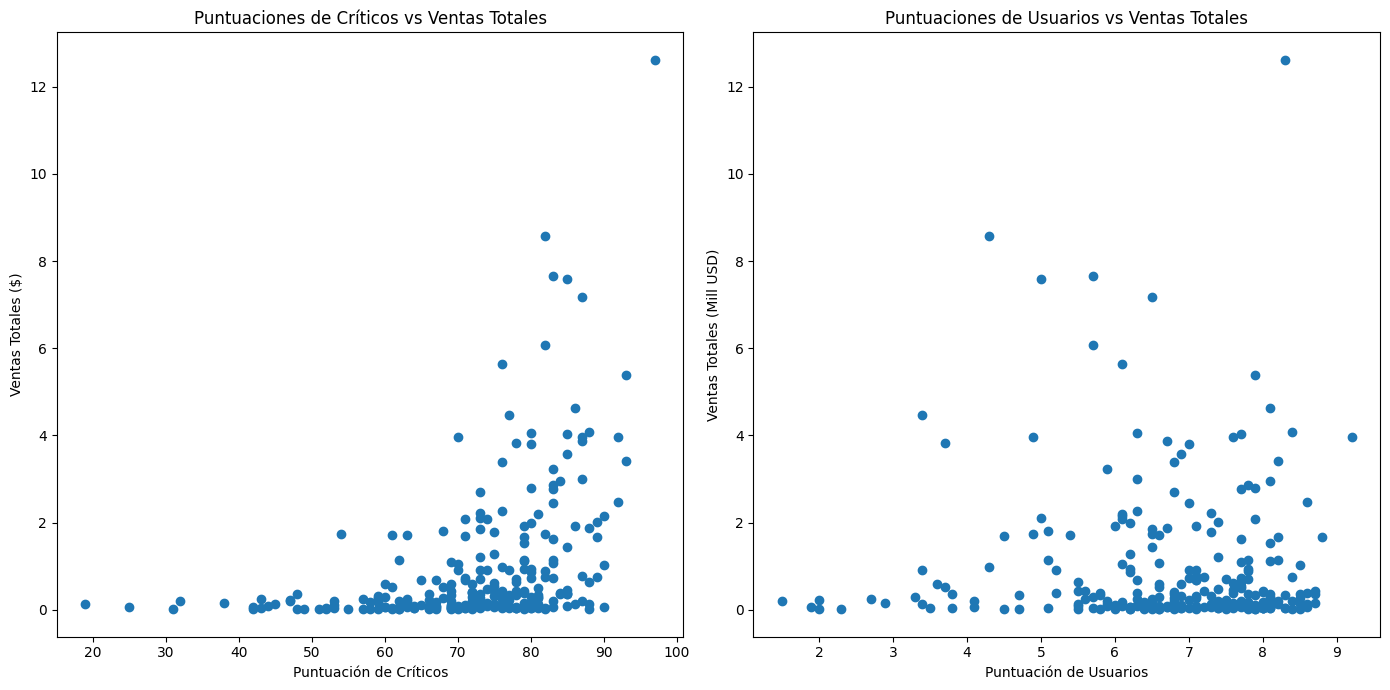

In [29]:
ps4_games = df_games_recent[df_games_recent['platform'] == 'PS4']

# Asegurarse de que las puntuaciones están en formato numérico y no contienen 'tbd'
ps4_games = ps4_games.replace('tbd', np.nan).dropna(
    subset=['user_score', 'critic_score'])
ps4_games['user_score'] = ps4_games['user_score'].astype('float')
ps4_games['critic_score'] = ps4_games['critic_score'].astype('float')

# Configurar los subplots
fig, ax = plt.subplots(1, 2, figsize=(14, 7))
plt.grid()

# Gráfico de dispersión para las puntuaciones de críticos y ventas totales
ax[0].scatter(ps4_games['critic_score'], ps4_games['total_sales'])
ax[0].set_title('Puntuaciones de Críticos vs Ventas Totales')
ax[0].set_xlabel('Puntuación de Críticos')
ax[0].set_ylabel('Ventas Totales ($)')

# Gráfico de dispersión para las puntuaciones de usuarios y ventas totales
ax[1].scatter(ps4_games['user_score'], ps4_games['total_sales'])
ax[1].set_title('Puntuaciones de Usuarios vs Ventas Totales')
ax[1].set_xlabel('Puntuación de Usuarios')
ax[1].set_ylabel('Ventas Totales (Mill USD)')

# Mostrar el layout ajustado
plt.grid()
plt.tight_layout()
plt.show()

# Calcular el coeficiente de correlación de Pearson
critic_corr = ps4_games['critic_score'].corr(ps4_games['total_sales'])
user_corr = ps4_games['user_score'].corr(ps4_games['total_sales'])

print(f"Coeficiente de correlación entre las puntuaciones de críticos y ventas totales: {
      critic_corr:.2f}")
print(f"Coeficiente de correlación entre las puntuaciones de usuarios y ventas totales: {
      user_corr:.2f}")

## <u>Observaciones</u>

Los gráficos de dispersión nos permiten visualizar la relación entre las puntuaciones y las ventas, mientras que los coeficientes de correlación proporcionan un valor numérico para entender la fuerza y la dirección de la relación lineal entre las puntuaciones y las ventas.

**Un coeficiente de correlación de 0.41** entre las puntuaciones de los críticos y las ventas totales indica una correlación positiva moderada. Esto significa que existe una tendencia a que los juegos con puntuaciones más altas de los críticos tengan mejores ventas, pero la relación no es extremadamente fuerte. Es probable que otros factores además de las puntuaciones de los críticos también influyan significativamente en las ventas totales. Seria bueno estudiar si el mejorar la exposición de los resultados de los críticos influye o no en los resultados de ventas de los videojuegos.

**El coeficiente de correlación casi nulo de -0.03** entre las puntuaciones de los usuarios y las ventas totales sugiere que no hay una relación lineal discernible entre cómo los usuarios califican los juegos y las ventas que esos juegos logran. Esto implica que las puntuaciones de los usuarios no son un predictor confiable de las ventas totales y que las decisiones de compra pueden estar influenciadas por otros factores que no se reflejan en las puntuaciones de los usuarios.

Basándose en estos coeficientes, los editores y desarrolladores de juegos pueden considerar priorizar las críticas de expertos y las estrategias de marketing que resaltan las puntuaciones de críticos sobre las campañas centradas en la popularidad o en las puntuaciones de los usuarios. Sin embargo, dada la correlación moderada con las puntuaciones de los críticos, no se debe descuidar el desarrollo de aspectos del juego que no se reflejan en dichas puntuaciones, como la jugabilidad, la innovación y el valor de entretenimiento.

En definitiva, este análisis destaca la importancia de una revisión crítica favorable para el éxito comercial de un juego, aunque también subraya la complejidad del mercado y la influencia de múltiples factores en las ventas de videojuegos.


## <u>Juegos a través de plataformas</u>

<!-- Echa un vistazo a la distribución general de los juegos por género. ¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas? -->


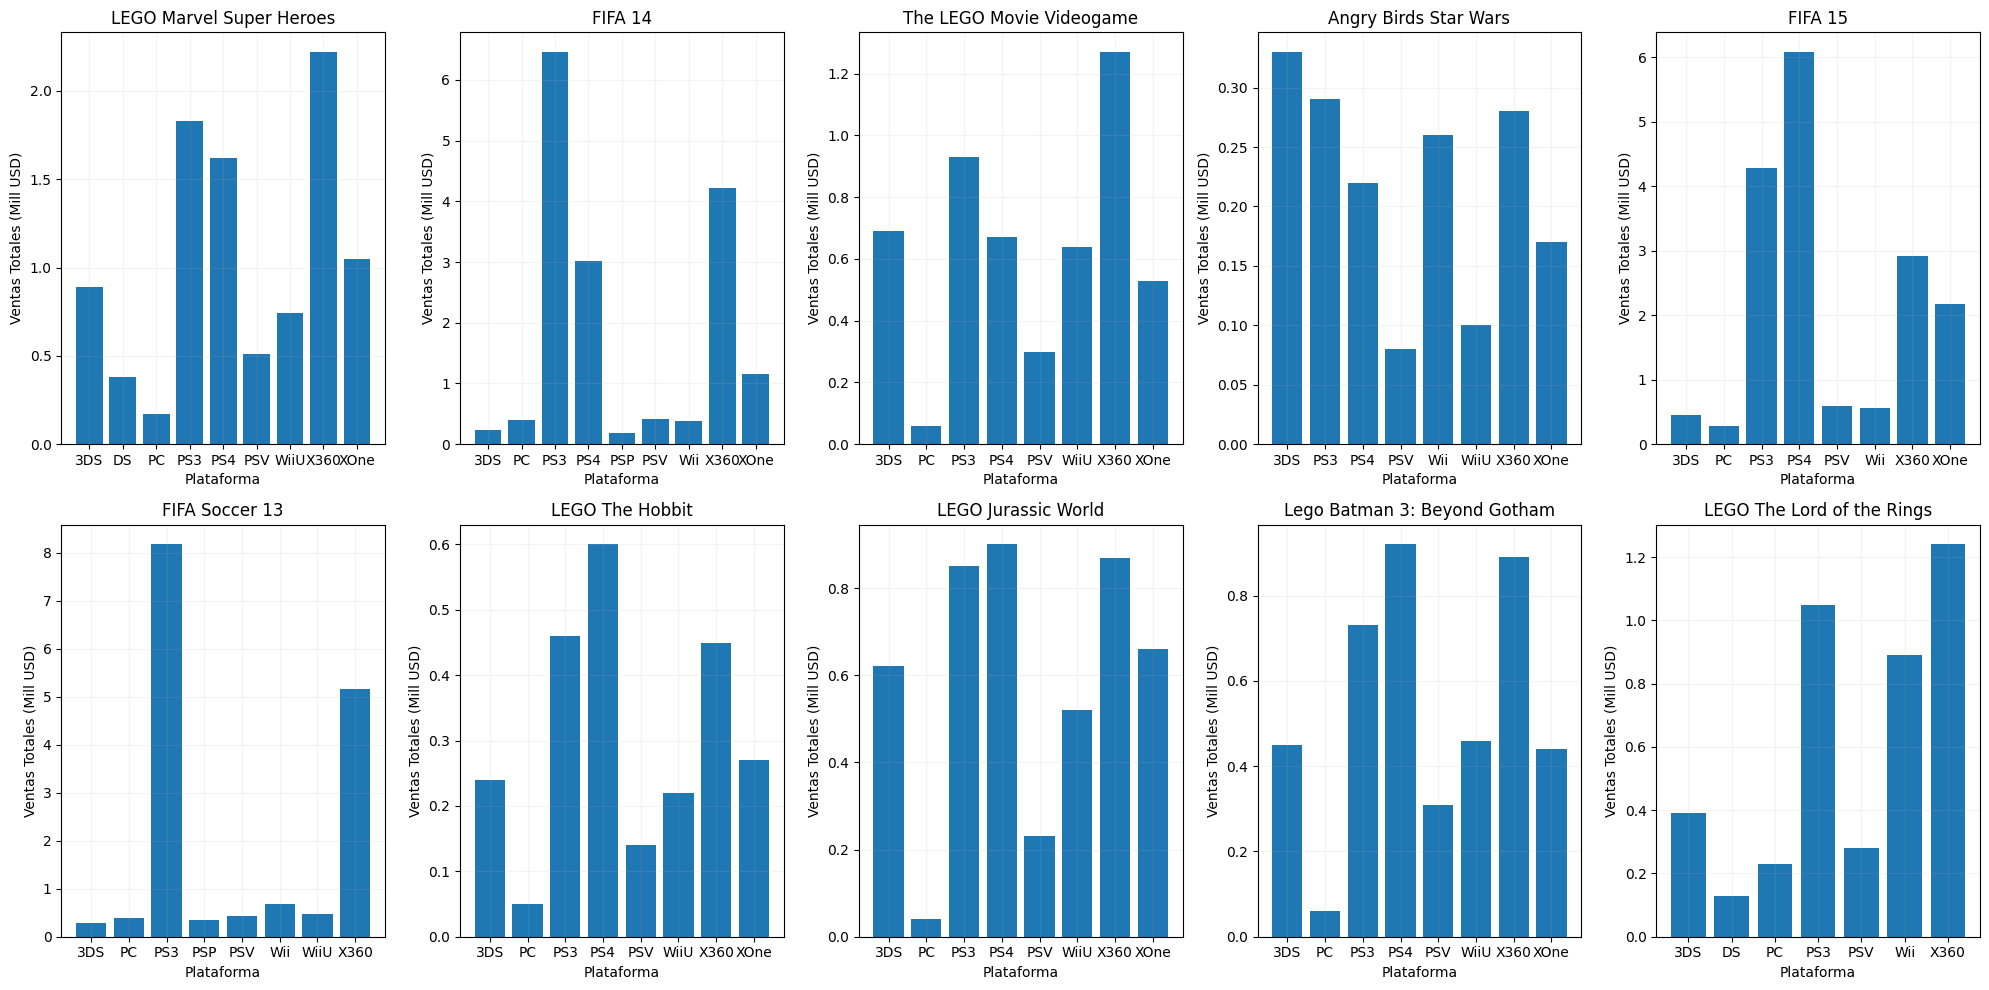

In [34]:
# Paso 1: Identificar juegos multiplataforma
juegos_multiplataforma = df_games_recent.groupby('name').platform.nunique()
juegos_multiplataforma = juegos_multiplataforma[juegos_multiplataforma > 1]

# Paso 2: Agrupar ventas por juego y plataforma
ventas_juego_plataforma = df_games_recent[df_games_recent['name'].isin(juegos_multiplataforma.index)].groupby([
    'name', 'platform']).total_sales.sum().reset_index()

# Paso 3: Analizar las ventas por juego en cada plataforma
list_of_games = juegos_multiplataforma.sort_values(ascending=False).head(10)

# Configurar la figura y los ejes para los subplots con 2 filas y 5 columnas
fig, axes = plt.subplots(2, 5, figsize=(20, 10), constrained_layout=True)

# Aplanar el array de ejes para facilitar el acceso en un bucle
axes = axes.flatten()

# Bucle para graficar cada juego en un subplot
for i, game in enumerate(list_of_games.index):
    # Filtrar el DataFrame para el juego actual
    ventas_juego_especifico = ventas_juego_plataforma[ventas_juego_plataforma['name'] == game]
    # Crear el gráfico de barras para el juego actual en el i-ésimo subplot
    axes[i].bar(ventas_juego_especifico['platform'],
                ventas_juego_especifico['total_sales'])
    # Establecer el título y las etiquetas de los ejes
    axes[i].set_title(game)
    axes[i].set_xlabel('Plataforma')
    axes[i].set_ylabel('Ventas Totales (Mill USD)')
    # Añadir grillas para mejor visualización
    axes[i].grid(True, alpha=0.15)

# Ajustar la disposición de los subplots para evitar que se solapen los títulos y etiquetas
plt.tight_layout()

# Paso 4: Visualizar los resultados
plt.show()

## <u>Observaciones</u>

<!-- Teniendo en cuenta tus conclusiones compara las ventas de los mismos juegos en otras plataformas. -->

A partir de los gráficos de barras proporcionados, podemos destacar 3 puntos clave:

- **Diferencias de Ventas por Plataforma**: Cada juego muestra un patrón de ventas diferente a través de las plataformas. Algunos juegos venden más en ciertas plataformas que en otras, lo que podría estar influenciado por la popularidad de la plataforma, la base de usuarios o la compatibilidad y el rendimiento del juego en esa plataforma en particular. Un ejemplo de este es el logro en ventas del `FIFA 15` en la `PS4`, donde podría atribuirse un mejor aprovechamiento de los recursos de la consola para el despliegue y jugabilidad de este.

- **Éxitos Multiplataforma**: Juegos como "FIFA 14" y "FIFA 15" muestran ventas significativas en múltiples plataformas, lo que sugiere un fuerte atractivo multiplataforma y una marca bien establecida que atrae a jugadores en diferentes dispositivos en lo relativo a este juego.

- **Tendencias de Ventas**: Algunas plataformas más antiguas la 3DS muestran ventas menores o nulas en comparación con plataformas más modernas como PS4 y Xbox One, lo que refleja el cambio generacional en la tecnología de juegos y las preferencias de los consumidores.


## <u>Juegos por género</u>

<!-- Echa un vistazo a la distribución general de los juegos por género. ¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas? -->


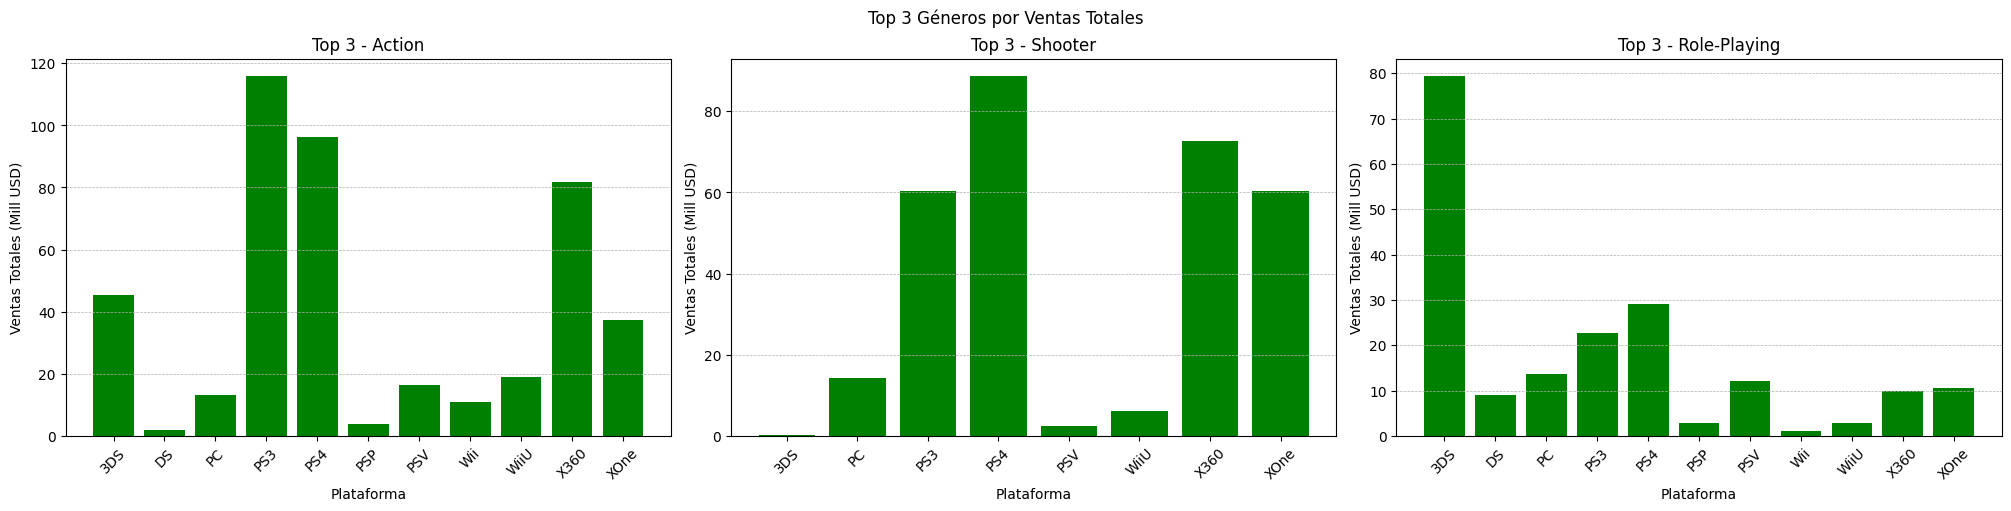

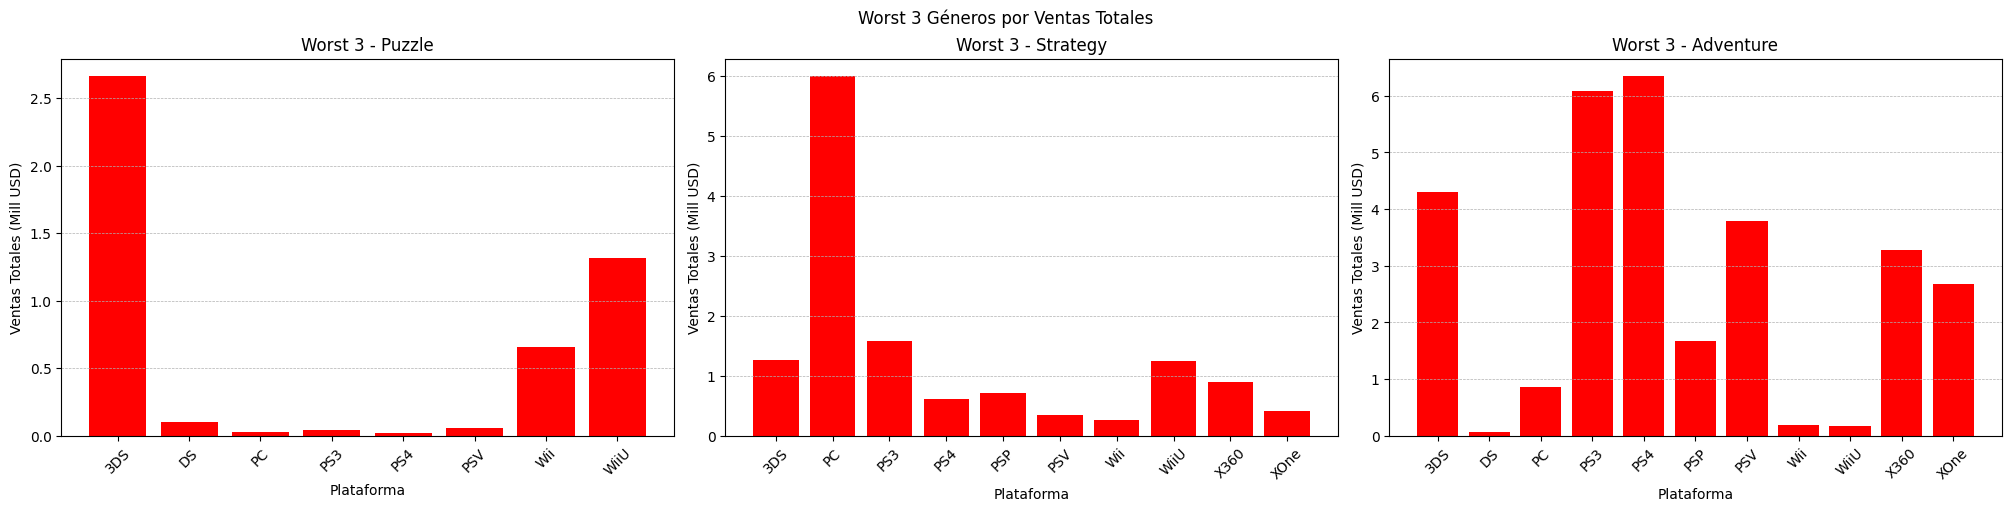

In [35]:
# Agrupar las ventas por género y plataforma
ventas_por_genero_plataforma = df_games_recent.pivot_table(
    index='platform',
    columns='genre',
    values='total_sales',
    aggfunc='sum'
)

# Obtener los 3 géneros con mayores ventas y los 3 con menores ventas
top_3_generos = ventas_por_genero_plataforma.sum().nlargest(3).index
bottom_3_generos = ventas_por_genero_plataforma.sum().nsmallest(3).index

# Crear un gráfico para los Top 3 géneros
fig, axes = plt.subplots(1, 3, figsize=(20, 5), constrained_layout=True)
for i, genre in enumerate(top_3_generos):
    ventas_genero = ventas_por_genero_plataforma[genre].dropna()
    axes[i].bar(ventas_genero.index, ventas_genero.values, color='green')
    axes[i].set_title(f'Top 3 - {genre}')
    axes[i].set_xlabel('Plataforma')
    axes[i].set_ylabel('Ventas Totales (Mill USD)')
    axes[i].grid(True, which='both', axis='y', linestyle='--', linewidth=0.5)
    # Rotación de las etiquetas del eje x
    axes[i].tick_params(axis='x', rotation=45)
plt.suptitle('Top 3 Géneros por Ventas Totales')
plt.show()

# Crear un gráfico para los Worst 3 géneros
fig, axes = plt.subplots(1, 3, figsize=(20, 5), constrained_layout=True)
for i, genre in enumerate(bottom_3_generos):
    ventas_genero = ventas_por_genero_plataforma[genre].dropna()
    axes[i].bar(ventas_genero.index, ventas_genero.values, color='red')
    axes[i].set_title(f'Worst 3 - {genre}')
    axes[i].set_xlabel('Plataforma')
    axes[i].set_ylabel('Ventas Totales (Mill USD)')
    axes[i].grid(True, which='both', axis='y', linestyle='--', linewidth=0.5)
    # Rotación de las etiquetas del eje x
    axes[i].tick_params(axis='x', rotation=45)
plt.suptitle('Worst 3 Géneros por Ventas Totales')
plt.show()

Las plataformas como PS4 y Xbox One tienen un desempeño sobresaliente en géneros populares como Action y Shooter, lo que podría reflejar la preferencia de los jugadores y la fortaleza de estas consolas en el mercado. La concentración de altas ventas en estas plataformas sugiere una fuerte presencia y aceptación en el mercado por lo que a futuro, en caso de lanzar un videojuego de este género es una buena opción considerarlas.

Los géneros con ventas más bajas como Puzzle y Strategy no muestran una dominancia clara en ninguna plataforma, lo que podría indicar una menor popularidad o una distribución más uniforme entre las diferentes opciones de consolas y PC.

La preferencia de género por plataforma es notable, con plataformas como 3DS liderando en Role-Playing y PS4-PS3 con el género de action, lo que puede informar a los editores sobre dónde enfocar sus esfuerzos de desarrollo y promoción para maximizar el impacto en el mercado.

Estas conclusiones subrayan la importancia de entender las dinámicas del mercado de videojuegos y la necesidad de que los desarrolladores y editores adapten sus estrategias de lanzamiento y promoción para alinearse con las preferencias de género específicas de cada plataforma. Esto no solo puede aumentar las ventas sino también fortalecer la lealtad de marca y la presencia en el mercado en un ciclo de retroalimentación positiva que beneficia tanto a jugadores como a creadorse.


## <u>Segmentación de usuarios</u>


In [36]:
# Paso 1: Agrupar las ventas por plataforma en cada región
na_sales = df_games_recent.groupby('platform')['n_a_sales'].sum(
).sort_values(ascending=False).head(5)
eu_sales = df_games_recent.groupby('platform')['e_u_sales'].sum(
).sort_values(ascending=False).head(5)
jp_sales = df_games_recent.groupby('platform')['j_p_sales'].sum(
).sort_values(ascending=False).head(5)

# Paso 2: Crear DataFrames para las ventas por región y combinarlos
top_na_platforms = na_sales.reset_index().rename(columns={'NA_sales': 'Sales'})
top_eu_platforms = eu_sales.reset_index().rename(columns={'EU_sales': 'Sales'})
top_jp_platforms = jp_sales.reset_index().rename(columns={'JP_sales': 'Sales'})

In [37]:
# Puedes imprimir los DataFrames para ver las plataformas top en cada región.
print("Top 5 Platforms in NA:\n", top_na_platforms)
print("\nTop 5 Platforms in EU:\n", top_eu_platforms)
print("\nTop 5 Platforms in JP:\n", top_jp_platforms)

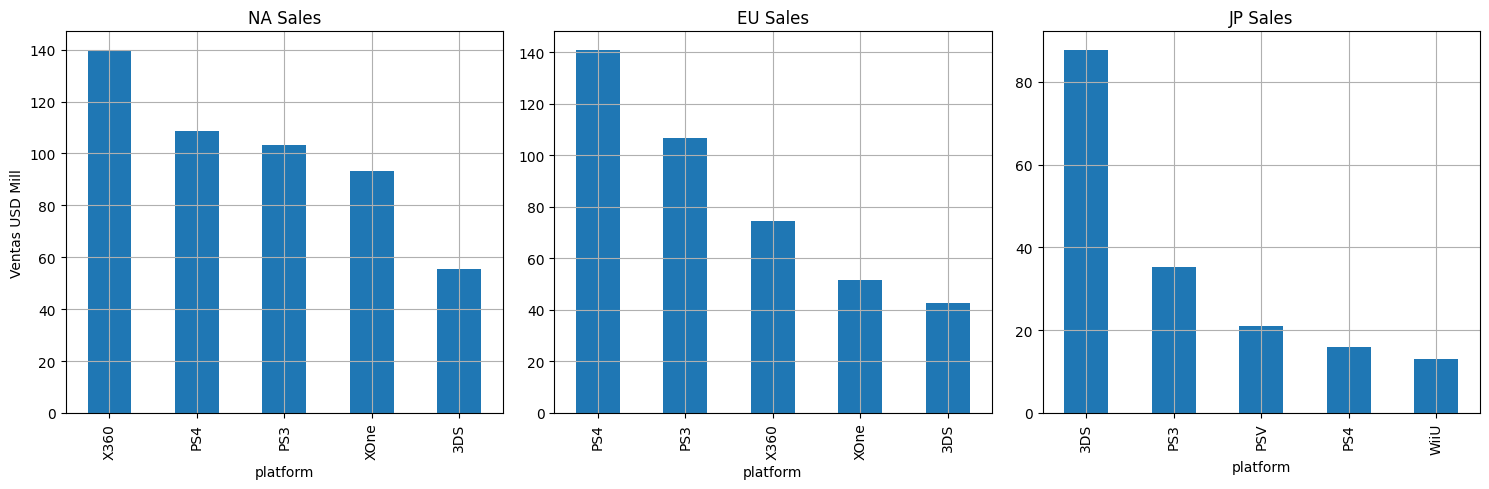

In [38]:
# Para visualizar estas variaciones, podrías usar gráficos de barras.
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

top_na_platforms.plot(kind='bar', x='platform', y='n_a_sales',
                      ax=ax[0], title='NA Sales', legend=False, grid=True, ylabel='Ventas USD Mill')
top_eu_platforms.plot(kind='bar', x='platform', y='e_u_sales',
                      ax=ax[1], title='EU Sales', legend=False, grid=True)
top_jp_platforms.plot(kind='bar', x='platform', y='j_p_sales',
                      ax=ax[2], title='JP Sales', legend=False, grid=True)

plt.tight_layout()
plt.show()

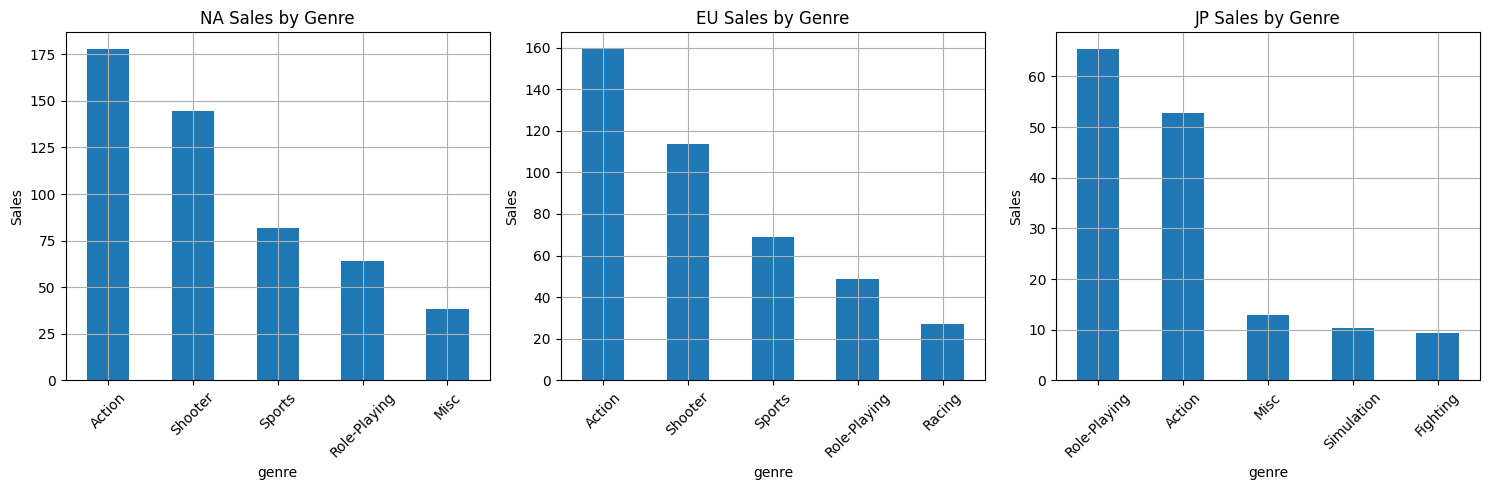

In [39]:
# Paso 1: Agrupar las ventas por género en cada región y sumar
na_sales_by_genre = df_games_recent.groupby(
    'genre')['n_a_sales'].sum().sort_values(ascending=False).head(5)
eu_sales_by_genre = df_games_recent.groupby(
    'genre')['e_u_sales'].sum().sort_values(ascending=False).head(5)
jp_sales_by_genre = df_games_recent.groupby(
    'genre')['j_p_sales'].sum().sort_values(ascending=False).head(5)

fig, ax = plt.subplots(1, 3, figsize=(15, 5))


na_sales_by_genre.plot(
    kind='bar', ax=ax[0], title='NA Sales by Genre', legend=False, grid=True)
ax[0].set_ylabel('Sales')
ax[0].tick_params(axis='x', rotation=45)

eu_sales_by_genre.plot(
    kind='bar', ax=ax[1], title='EU Sales by Genre', legend=False, grid=True)
ax[1].set_ylabel('Sales')
ax[1].tick_params(axis='x', rotation=45)

jp_sales_by_genre.plot(
    kind='bar', ax=ax[2], title='JP Sales by Genre', legend=False, grid=True)
ax[2].set_ylabel('Sales')
ax[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

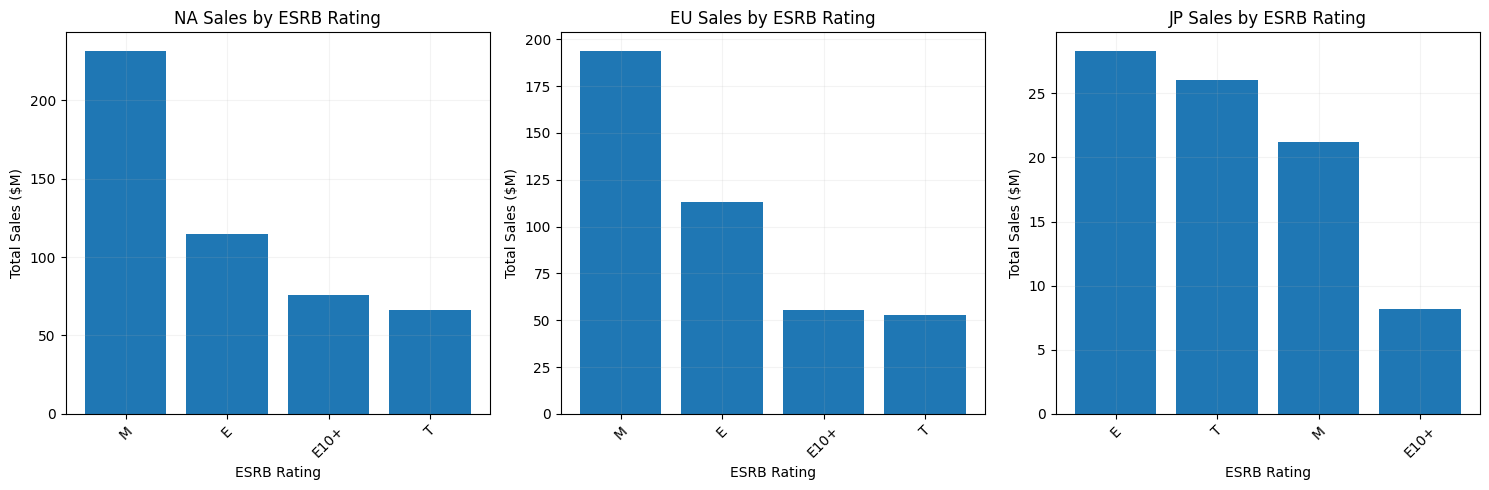

In [40]:
# Agrupar las ventas por clasificación ESRB en cada región
na_rating = df_games_recent.groupby(
    'rating')['n_a_sales'].sum().sort_values(ascending=False)
eu_rating = df_games_recent.groupby(
    'rating')['e_u_sales'].sum().sort_values(ascending=False)
jp_rating = df_games_recent.groupby(
    'rating')['j_p_sales'].sum().sort_values(ascending=False)

# Crear un gráfico para visualizar las ventas por clasificación ESRB en cada región
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Gráfico para Norteamérica
ax[0].bar(na_rating.index, na_rating.values)
ax[0].set_title('NA Sales by ESRB Rating')
ax[0].set_xlabel('ESRB Rating')
ax[0].set_ylabel('Total Sales ($M)')
ax[0].tick_params(axis='x', rotation=45)
ax[0].grid(alpha=0.15)

# Gráfico para Europa
ax[1].bar(eu_rating.index, eu_rating.values)
ax[1].set_title('EU Sales by ESRB Rating')
ax[1].set_xlabel('ESRB Rating')
ax[1].set_ylabel('Total Sales ($M)')
ax[1].tick_params(axis='x', rotation=45)
ax[1].grid(alpha=0.15)

# Gráfico para Japón
ax[2].bar(jp_rating.index, jp_rating.values)
ax[2].set_title('JP Sales by ESRB Rating')
ax[2].set_xlabel('ESRB Rating')
ax[2].set_ylabel('Total Sales ($M)')
ax[2].tick_params(axis='x', rotation=45)
ax[2].grid(alpha=0.15)

# Ajustar la disposición de los subplots para evitar solapamientos
plt.tight_layout()
plt.show()

### <u>Observaciones</u>

Las imagenes muestran una comparación de las ventas totales de videojuegos tanto por plataforma como por género en tres regiones clave: Norteamérica (NA), Europa (EU) y Japón (JP). En la primera imagen, que muestra las ventas por plataforma, observamos que ciertas plataformas, como la X360 y la PS4, tienen un rendimiento destacado en Norteamérica y Europa, mientras que en Japón, plataformas como la DS y la PS3 muestran números significativos, lo cual es coherente con las conocidas preferencias de juego en esa región donde las consolas portátiles y las franquicias de juegos de larga duración tienen un gran seguimiento.

La segunda imagen, que se enfoca en las ventas por género, ilustra que los géneros de Acción y Shooter son populares en Norteamérica y Europa, lo que refleja una preferencia occidental por juegos dinámicos y competitivos. En contraste, en Japón, el género de Rol (RPG) es el más destacado, lo que no sorprende dada la rica historia de Japón en el desarrollo de juegos de rol profundos y narrativos que han tenido un impacto cultural significativo en esa región. Es destacable que los jeugos de acción estánj posicionandose en un lugar importante respecto de la primera preferencia por lo que es dable considerar este mercado como uno al que poner ojo en ese género en particular.

La última imagen nos muestra la segmentación de las ventas totales de los videojuegos de acuerdo a la clasificacion ESRB para las regiones de NorteAmerica, Europa y Japón. De ella se puede apreciar que en las tres regiones los juegos clasificados como 'E' para todos los públicos lideran las ventas, lo que sugiere una fuerte demanda de títulos familiares y accesibles a jugadores de todas las edades. Las clasificaciones 'T' para adolescentes y 'M' para adultos también muestran números de ventas significativos, lo que indica una sólida base de jugadores adolescentes y adultos. Estas tendencias sugieren que los juegos que abarcan un rango más amplio de audiencias tienden a tener mejor desempeño en términos de ventas en estas regiones.

En contraste, Japón muestra una preferencia distinta por juegos clasificados para 'E', lo que podría reflejar diferencias culturales en las preferencias de juego o en la demografía de los jugadores. La clasificación 'M' sigue siendo importante, pero no domina el mercado tanto como en Norteamérica y Europa. Además, aunque tiene una presencia notable, no es tanto como las categorías 'E' y 'T' quedando relegada al tercer lugar.

Este patrón de ventas sugiere que la clasificación ESRB, que comunica información sobre el contenido y la idoneidad del juego para diferentes edades, lo que subraya la importancia de una estrategia de mercado diferenciada para las empresas de juegos que buscan maximizar su alcance y ventas en cada región y como esto puede tener un impacto en las decisiones de compra de los consumidores. Los editores de juegos pueden utilizar estos datos para orientar mejor sus estrategias de desarrollo y marketing hacia las clasificaciones ESRB que son más populares en cada región, maximizando así el alcance y la rentabilidad de sus títulos.


<div class="alert alert-block alert-success">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
¡Muy buen trabajo en esta sección, Aldo!
</div>

## <u>Hipótesis</u>

— Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

— Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

<!-- Establece tu mismo el valor de umbral alfa.
Explica:
— Cómo formulaste las hipótesis nula y alternativa.
— Qué criterio utilizaste para probar las hipótesis y por qué
Paso 6. Escribe una conclusión general
Formato: Completa la tarea en Jupyter Notebook. Inserta el código de programación en las celdas code y las explicaciones de texto en las celdas markdown. Aplica formato y agrega encabezados. -->


In [41]:
df_games_recent.info()

In [42]:
df_games_recent['user_score'] = df_games_recent['user_score'].astype('float64')

df_games_pivot = df_games_recent.pivot_table(
    index='platform',
    values='user_score',
    aggfunc='mean'
)

## <u>Hipótesis 1</u>

### **Hipótesis Nula (H0):**

Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC **no son diferentes**. En términos matemáticos, esto se puede expresar como:

$$ H*0: \mu*{\text{Xbox One}} = \mu\_{\text{PC}} $$

### **Hipótesis Alternativa (H1):**

Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC **son diferentes**. Esto se expresa matemáticamente como:

$$ H*1: \mu*{\text{Xbox One}} \neq \mu\_{\text{PC}} $$

La prueba estadística t de Student para muestras independientes, nos permitirá evaluar si los datos proporcionan evidencia suficiente para rechazar la hipótesis nula en favor de la hipótesis alternativa. Si el p-valor resultante de la prueba eresulta ser menor que el nivel de significancia preestablecido (0.05), entonces rechazamos la hipótesis nula y aceptamos la hipótesis alternativa, concluyendo que existe una diferencia significativa en las calificaciones promedio entre las dos plataformas.


In [45]:
# Filtramos los datos para las plataformas Xbox One (XOne) y PC
xbox_one_scores = df_games_recent[(df_games_recent['platform'] == 'XOne') & (
    df_games_recent['user_score'].notna())]['user_score']
pc_scores = df_games_recent[(df_games_recent['platform'] == 'PC') & (
    df_games_recent['user_score'].notna())]['user_score']

# Calculamos los promedios
average_xbox_one = xbox_one_scores.mean()
average_pc = pc_scores.mean()

# Imprimimos los promedios para revisión
print(f"Promedio de calificaciones de usuarios para Xbox One: {
      average_xbox_one:.2f}")
print(f"Promedio de calificaciones de usuarios para PC: {average_pc:.2f}")

t_stat, p_value = st.ttest_ind(xbox_one_scores, pc_scores)

# Imprimimos el resultado de la prueba t
print(f"P-valor: {p_value:.5f}")

# Interpretación del resultado de la prueba t
alpha = 0.05  # Nivel de significancia
if p_value < alpha:
    print("\nRechazamos la hipótesis nula: Existe una diferencia significativa entre las calificaciones.")
else:
    print("\nNo rechazamos la hipótesis nula: No hay una diferencia significativa entre las calificaciones.")

## <u>Hipótesis 2</u>

### **Hipótesis Nula (H0):**

Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes **no son diferentes**. En términos matemáticos, esto se puede expresar como:

$$ H*0: \mu*{\text{Acción}} = \mu\_{\text{Deportes}} $$

### **Hipótesis Alternativa (H1):**

Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes **son diferentes**. En términos matemáticos, esto se puede expresar como:

$$ H*0: \mu*{\text{Acción}} \neq \mu\_{\text{Deportes}} $$

La prueba estadística t de Student para muestras independientes, nos permitirá evaluar si los datos proporcionan evidencia suficiente para rechazar la hipótesis nula en favor de la hipótesis alternativa. Si el p-valor resultante de la prueba eresulta ser menor que el nivel de significancia preestablecido (0.05), entonces rechazamos la hipótesis nula y aceptamos la hipótesis alternativa, concluyendo que existe una diferencia significativa en las calificaciones promedio entre los dos géneros.


In [46]:
df_games_recent['genre'].unique()

In [50]:
# Filtramos los datos para los géneros Action y Sports
action_scores = df_games_recent[(df_games_recent['genre'] == 'Action') & (
    df_games['user_score'].notna())]['user_score']
sports_scores = df_games_recent[(df_games_recent['genre'] == 'Sports') & (
    df_games_recent['user_score'].notna())]['user_score']

# Calculamos los promedios
average_action = action_scores.mean()
average_sports = sports_scores.mean()

# Imprimimos los promedios para revisión
print(f"Promedio de calificaciones de usuarios para el género Action: {
      average_action:.2f}")
print(f"Promedio de calificaciones de usuarios para el género Sports: {
      average_sports:.2f}")

# Realizamos la prueba t de Student para muestras independientes
t_stat, p_value = st.ttest_ind(action_scores, sports_scores)

# Imprimimos el resultado de la prueba t
print(f"Estadístico t: {t_stat:.5f}, P-valor: {p_value}")

# Interpretación del resultado de la prueba t
alpha = 0.05  # Nivel de significancia
if p_value < alpha:
    print("\nRechazamos la hipótesis nula: Existe una diferencia significativa entre las calificaciones de los géneros Action y Sports.")
else:
    print("\nNo rechazamos la hipótesis nula: No hay una diferencia significativa entre las calificaciones de los géneros Action y Sports.")

**Criterio para Probar Hipótesis:**
La prueba t de Student para muestras independientes fue el criterio utilizado para probar las hipótesis. Se eligió por varias razones:

- Comparación de Medias: La prueba t es adecuada para comparar las medias de dos grupos independientes y es útil cuando no conocemos las desviaciones estándar poblacionales.
- Datos Cuantitativos: La calificación de los usuarios es una variable cuantitativa, lo cual es un requisito para la prueba t.
- Tamaño de Muestra: La prueba t es robusta incluso con tamaños de muestra pequeños, asumiendo que los datos tienen una distribución aproximadamente normal.
- Varianzas Desconocidas: Asumimos que no sabemos si las varianzas de los dos grupos son iguales, y la prueba t para muestras independientes puede adaptarse a esto.


<div class="alert alert-block alert-success">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
¡Perfecto! Las pruebas fueron llevadas a cabo correctamente y concuerdo con tus conclusiones.
</div>

# <u>**Conclusiones Generales**</u>

El análisis meticuloso de las tendencias del mercado de videojuegos durante el período de 2011 a 2016 desvela un panorama diverso, donde las predilecciones en plataformas y géneros varían significativamente entre regiones clave como Norteamérica, Europa y Japón. Este patrón de consumo regionalizado resalta la necesidad imperante de estrategias de mercado personalizadas que no solo reconozcan estas preferencias sino que también las aprovechen para optimizar las ventas.

En Norteamérica y Europa, las consolas de sobremesa como la X360 y la PS4 han demostrado ser las más populares, posiblemente debido a su afinidad con géneros de juegos intensos y competitivos como los shooters y juegos de acción. Por otro lado, en Japón, la predilección por las consolas portátiles y los juegos de rol es notable, lo que refleja una tendencia cultural hacia juegos con narrativas complejas y mecánicas de juego profundas.

La clasificación ESRB emerge como un indicador significativo de éxito en ventas, con los juegos clasificados como 'E' para todos los públicos liderando en todas las regiones. Sin embargo, la clasificación 'M' para público maduro tiene una presencia importante en Norteamérica y Europa, mientras que en Japón, esta categoría es superada por las clasificaciones 'E' y 'T'.

## Estrategias de Venta para 2017:

Para capitalizar las tendencias identificadas, las estrategias de venta sugeridas para el año 2017 deben enfocarse en la regionalización del Contenido, es decir, adaptar los lanzamientos de videojuegos a los gustos regionales específicos, asegurando que las consolas de sobremesa en NA y EU estén abastecidas con juegos de acción y shooters de alta calidad, mientras que en Japón, se debe priorizar el desarrollo y la promoción de juegos de rol para consolas portátiles.

Asimismo, se sugiere utilizar la clasificación ESRB como Herramienta de Marketing para segmentar el mercado y dirigir las campañas publicitarias, poniendo énfasis en juegos 'E' para alcanzar al público más amplio posible, pero sin descuidar la producción y promoción de juegos 'M' que han demostrado tener un mercado considerable en NA y EU.

Aunque los géneros como Puzzle y Strategy han demostrado ser menos populares, hay una oportunidad de renovación e innovación que podría abrir nuevos nichos de mercado. Una estrategia sería el desarrollo de estos géneros con un enfoque fresco, integrando elementos de realidad aumentada o mecánicas de juego social para atraer a nuevos jugadores.

Dado el coeficiente de correlación moderado entre las puntuaciones de críticos y ventas, se debe poner un énfasis renovado en la calidad y en obtener críticas favorables. Esto podría incluir inversiones en el desarrollo de juegos con historias ricas, gráficos avanzados y mecánicas de juego innovadoras que puedan atraer críticas positivas.

Las plataformas de PS4 y Xbox One han sido líderes, sin embargo, no se debe descuidar el mercado de PC y de consolas portátiles, especialmente en regiones como Japón. La estrategia debe incluir la promoción de juegos multiplataforma y el aprovechamiento de las capacidades únicas de cada sistema.

En resumen, las estrategias de venta para 2017 deben ser multifacéticas, aprovechando los patrones de consumo regionales, la importancia de la clasificación ESRB y la calidad percibida por críticos y jugadores. Al mirar hacia el futuro, los editores y desarrolladores que se adapten rápidamente a las dinámicas del mercado y a las preferencias de los jugadores.


<div class="alert alert-block alert-success">
    
# Comentarios generales
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Todo corregido, Aldo. Has aprobado un nuevo proyecto. ¡Felicitaciones!
</div>